# Import required packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn')

# Exercise 1

In [2]:
a_array = np.array([1, 2, 3, 4, 5])

#Up to 4, not including 1
b_array = a_array[0:4]

print(a_array)
print(b_array)

b_array[0] = 1000

##Array affect each other

print(a_array)
print(b_array)

[1 2 3 4 5]
[1 2 3 4]
[1000    2    3    4    5]
[1000    2    3    4]


In [3]:
#You can duplicate inorder to not change each array that are related.
copy = a_array.copy()
copy[0] = 1

print(copy)
print(b_array)

[1 2 3 4 5]
[1000    2    3    4]


In [4]:
copy.reshape(5, 1)

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [5]:
#Not including last number
np.arange(0, 11, 2)

array([ 0,  2,  4,  6,  8, 10])

# Exercise 2

In [6]:
#Negative one is a unknown side 

x = np.arange(1, 7)
x.reshape(-1, 2)
print(x)
print(x.shape)

[1 2 3 4 5 6]
(6,)


In [7]:
#Can you try reshape(-1,2) on the arrays returned by np.arange(1,n) with
#different values of n, where n is an integer?
# What is the condition for n which no error is returned ?

#### Condition is - the amount of elements must be even and has to be a natural number

y = np.arange(1, 3)
y.reshape(-1, 2)

array([[1, 2]])

# Exercise 3

In [8]:
a = np.array([0, 1, 2])
b = np.array([3, 0, 0])

Numerator = np.dot(a, b)
Denominator = np.dot(np.linalg.norm(a), np.linalg.norm(b))

print(np.arccos(Numerator / Denominator) * 180/np.pi)

#print(np.arccos(0))
print(np.pi/2)



90.0
1.5707963267948966


# Exercise 4 - Linear Regression Exercise

## Simulation of mock data 

Suppose the independent variable $x$ and the response variable $y$ follow a linear relationship, i.e.:

$$ y  = \mathbf{\beta}^\top \cdot \mathbf{x} = \beta_0 + \beta_1 x$$

where

$$
\mathbf{\beta}
=
\begin{bmatrix} 
\beta_0 \\
\beta_1
\end{bmatrix} 
\text{     and,    } 
\mathbf{x}
=
\begin{bmatrix} 
1 \\
x
\end{bmatrix} 
$$


$\beta_0$ is the intercept term and $\beta_1$ is the slope term.

In [9]:
'''
y = mx + c
m is the gradient
c is the y-intercept

so y = 𝛽1 * x + 𝛽0
'''

'\ny = mx + c\nm is the gradient\nc is the y-intercept\n\nso y = 𝛽1 * x + 𝛽0\n'

We want to create some mock data $(X,Y)$ of $N=1000$ data points with certain amount of Gaussian noise $\epsilon \sim \mathcal{N} (0,1) $.


Where 

$$
X
=
\begin{bmatrix}
\mathbf{x_1}, 
\mathbf{x_2}, 
\cdots,
\mathbf{x_N}
\end{bmatrix}
=
\begin{bmatrix}
1 & 1& & 1\\
& &\cdots &\\
x_1 & x_2& & x_N
\end{bmatrix}
\text{         and ,     }
Y
=
\begin{bmatrix}
y_1,
y_2,
\cdots,
y_N
\end{bmatrix}
$$




and

$$ y_i = \mathbf{\beta}^\top \cdot \mathbf{x}_i + \epsilon_i = \beta_0 + \beta_1 x_i + \epsilon_i $$ for $i=1 \ldots N$


Let's assume $\beta_0 = 3$ and $\beta_1 = 10$.

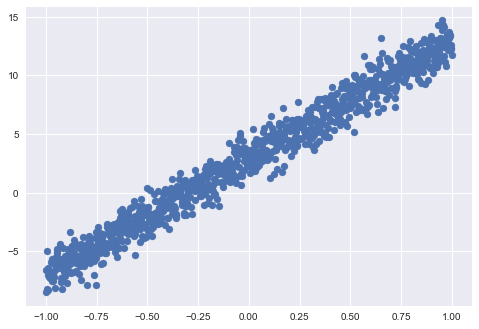

In [10]:
N = 1000 #sample size

true_beta = np.array([3,10])
x = np.linspace(-1,1,N)
x1 = np.vstack([np.ones(x.shape), x])

eps = np.random.normal(0,1,N)

y = np.matmul(true_beta, x1) + eps


plt.scatter(x,y)

In [11]:
x1

array([[ 1.      ,  1.      ,  1.      , ...,  1.      ,  1.      ,
         1.      ],
       [-1.      , -0.997998, -0.995996, ...,  0.995996,  0.997998,
         1.      ]])

In [12]:
y

array([-8.48207564, -6.58786038, -4.96000564, -8.19448069, -8.32066663,
       -6.98235815, -6.42055143, -7.00481766, -7.15285565, -6.92652715,
       -6.73051297, -7.29603268, -5.86939585, -7.26311703, -7.56020295,
       -5.69246854, -6.92110508, -7.5362867 , -6.9271896 , -7.22548294,
       -6.09873814, -6.05351829, -6.55183168, -8.14503946, -5.83029138,
       -5.46865408, -4.76643881, -4.96333949, -5.17656007, -5.55837793,
       -5.8210366 , -6.21554879, -6.28144308, -5.88289851, -4.3923548 ,
       -6.39042888, -7.64332009, -7.24397458, -6.08038466, -5.67975889,
       -8.23642104, -7.25358916, -4.75586709, -6.27472427, -6.80152837,
       -6.33738447, -6.11168279, -7.08381367, -5.43784195, -5.51301644,
       -6.01142898, -7.73635109, -5.5500672 , -6.14398639, -4.8084981 ,
       -5.18648209, -6.65394044, -4.90863994, -3.35904152, -5.41878937,
       -6.11330615, -6.8593812 , -5.69715787, -4.58246876, -4.57796645,
       -5.09458401, -4.68195637, -5.43576094, -5.14648581, -6.72

## Linear Regression

Suppose that we know $x$ and $y$ follow a linear relationship, but we do not know the value of $\mathbf{\beta}$. 
We want to build a linear model $f(\mathbf{x}; \beta)$ and estimate the value of $\mathbf{\beta}$ from data samples $(x_i,y_i)$, so that given any input $\mathbf{x}_i$, we can make a prediction $\hat{y_i}$:


$$ \hat{y_i} = f(\mathbf{x}_i; \beta) = \mathbf{\beta}^\top \cdot \mathbf{x}_i  = \beta_0 + \beta_1 x_i  $$




Define the mean squared error loss function which measure the error between our predictions and the actual values:

$$ l = \frac{1}{N} \sum_{i=1}^{N} (y_i-\hat{y_i})^2 $$

We can estimate the value of $\beta$ by finding the minimizer which minimizes $l$ using the Newton-Raphson algorithm.

$$
\mathbf{\hat{\beta}}
=
\text{argmin}_\beta \   l(\beta)
$$

## Gradient and Hessian

To use the Newton-Raphson algorithm, we need to calculate the gradient and Hessian of the loss function, which are the first order and second order partial derivatives of the loss function respectively.

### The first order partial derivatives of the loss function are:

$$
\begin{align}
\frac{\partial l}{\partial \beta_0} &= -\frac{2}{N} \sum_{i=1}^N (y_i-\hat{y_i}) \\
\frac{\partial l}{\partial \beta_1} &= -\frac{2}{N} \sum_{i=1}^N x_i \cdot (y_i-\hat{y_i}) 
\end{align}
$$

### The gradient of the loss function is: 

$$
\nabla l
=
\begin{bmatrix} 
\frac{\partial l}{\partial \beta_0} \\ 
\frac{\partial l}{\partial \beta_1}
\end{bmatrix}
= 
-2 \cdot
\begin{bmatrix} 
\frac{1}{N} \sum_{i=1}^N (y_i -\hat{y_i}) \\ 
\frac{1}{N} \sum_{i=1}^N x_i \cdot (y_i -\hat{y_i})
\end{bmatrix}
$$

In [13]:
# -2/N * (y - (mx + b))^2
#Y is the point at the time 

#You are tweeking m and b to make x,y as close as possible


### The second order partial derivatives of the loss function are:

$$ 
\begin{align}
\frac{\partial^2 l}{\partial \beta_0^2} &= 2 \\
\frac{\partial^2 l}{\partial \beta_1^2} &=  \frac{2}{N} \sum_{i=1}^N x_i^2 \\
\frac{\partial^2 l}{\partial \beta_0 \partial \beta_1}  
&=  
\frac{\partial^2 l}{\partial \beta_1 \partial \beta_0}
=
\frac{2}{N} \sum_{i=1}^N x_i 
\end{align}
$$


### The Hessian of the loss function is: 

$$ 
H 
= 
\begin{bmatrix} 
\frac{\partial^2 l}{\partial \beta_0^2} & \frac{\partial^2 l}{\partial \beta_0 \partial \beta_1} \\ \frac{\partial^2 l}{\partial \beta_1 \partial \beta_0} & \frac{\partial^2 l}{\partial \beta_1^2} 
\end{bmatrix} 
= 
2 \cdot
\begin{bmatrix}
1 & \frac{1}{N} \sum_{i=1}^N x_i \\
\frac{1}{N} \sum_{i=1}^N x_i & \frac{1}{N} \sum_{i=1}^N x_i^2
\end{bmatrix}
$$

## Newton-Raphson Algorithm (2nd Order Optimization)








Define the functions for our linear model and the loss function

In [14]:
np.reshape(x1 ,(20, 2))

ValueError: cannot reshape array of size 2000 into shape (20,2)

In [22]:
# Define the function for our linear model
#Will take tuple

#Beta * xi
def model(param,x1):
    return np.matmul(param, x1)



# Define the function for our loss function
def loss_func(param, x1, y):
    
    #print(np.shape(x1))
    
    y_hat = model(param, x1)
    
    return np.mean((y - y_hat) ** 2)




Newton-Raphson algorithm:

1. Initialize $\mathbf{\beta}$ by sampling from the standard normal distribution  $\mathcal{N} (0,1)$ 



2. At each iteration $k$, update the parameters $\mathbf{\beta}$ by this equation: \
   $$ \mathbf{\beta_{k+1}} = \mathbf{\beta_k} - H^{-1} \mathbf{\nabla} l(\beta_k) $$
     
     
3. Stop the algorithm when $|l(\beta_{k+1}) - l(\beta_k)| < \text{tolerance}$, we can use a small number, i.e. $10^{-7}$, as our tolerance value 


Hint:
1. You can use np.abs(delta) to compute the absolute value of delta


In [17]:
beta = np.random.normal(0,1,2) #initialize beta
tol = 1e-7 #toloerance
delta = 1

fBeta = loss_func(beta, x1, y)
gradient = -2 * np.array([np.mean(fBeta), np.mean(fBeta * x1)])
hessian = 2 * np.array([[1, np.mean(x1)], [np.mean(x1), np.mean(x1 ** 2)]])
hessian = np.linalg.inv(hessian)

print(gradient, hessian)

def decreasing(currentBeta, gradient, hessian, tol):
    
    #Hessian does not change, gradient changes
    #Solving for beta1
    leftSide = -1 * (currentBeta)
    rightSide = -1 *(hessian * gradient)
    NewBeta = np.linalg.solve(rightSide, leftSide)
    
    #New Gradient
    learning = loss_func(NewBeta, x1, y)
    NewGradient = -2 * np.array([np.mean(learning), np.mean(learning * x1)])
    
    #Calculating difference
    delta = np.subtract(NewBeta, currentBeta)
    delta = np.abs(delta)
    
    #Condition
    try:
        if  delta[0] < tol or delta[1] < tol:
            return currentBeta
        else:
            return decreasing(NewBeta, NewGradient, hessian, tol)
    
    except:
        print("Crashed")

beta = decreasing(beta, gradient, hessian, tol)
#beta = beta[1], beta[0]

beta

[-89.57185179 -44.7859259 ] [[ 0.79975995 -0.5995199 ]
 [-0.5995199   1.19903981]]


array([3.55265902e-08, 6.34666336e-08])

In [24]:
beta = np.random.normal(0,1,2) #initialize beta
tol = 1e-7 #toloerance
delta = 1 #a variable to store the value for l(\beta_{k+1}) - l(\beta_{k}), initialized to be 1
k = 0
h =  2*np.array([ [1, np.mean(x) ], [np.mean(x), np.mean(x**2)] ])

'''
Only the gradient changes each time, and also mean square error for each point

'''



while np.abs(delta) >= tol:
    
    y_hat = model(beta, x1)
    gradient = -2 * np.array([np.mean(y - y_hat), np.mean(x * (y - y_hat))])
    
    prev_loss = loss_func(beta, x1, y)
    
    #solution 1
    beta -= np.linalg.solve(h,gradient)
    
    #solution 2
    #inv_h = np.linalg.inv(h)
    #beta -= np.matmul(inv_h,g)
    current_loss = loss_func(beta, x1, y)
    
    delta = current_loss - prev_loss
    
    print('At {}-th step, the loss is {:.3f}'.format(k, current_loss))
    k += 1
    
    

At 0-th step, the loss is 1.018
At 1-th step, the loss is 1.018


# 

In [ ]:


def decreasing(FirstBeta, FinalDelta, tolerance, m1, m2):
    
    if (FinalDelta[0] < tolerance) or (FinalDelta[1] < tolerance):
        print("Hello")
        
    else:
        Beta2 = FirstBeta - (np.dot(m1, m2))
        FinalDelta = np.abs(NextBeta - FirstBeta)
        
        print(FirstBeta, Beta2, FinalDelta)
        
        return decreasing(NextBeta, FinalDelta, tol, m1, m2)
    



In [ ]:
#Old code
beta = np.random.normal(0,1,2) #initialize beta
tol = 1e-7 #toloerance
delta = [100, 100] #a variable to store the value for l(\beta_{k+1}) - l(\beta_{k}), initialized to be 1

#beta0, beta1 * x
#data is y 
#xIndependent = input("independent variable")

##Run X from above
def loss(bias, beta_value, points, mode):
    totalSum = 0
    
    if mode == 1:
        for i in range(len(bias)):
            xi = np.array([1, bias[i]])
            Y = points[i] - (np.matmul(beta_value.T, xi))
            
                             
            totalSum += Y
            
    elif mode == 2:
        
        for i in range(len(bias)):
            xi = np.array([1, bias[i]])
            Y = points[i] - (np.matmul(beta_value.T, xi))
            
            totalSum += xi * Y
        
        
    else:
        totalSum = np.zeros(2)
        for i in range(len(bias)):
            xi = np.array([1, bias[i]])
            
            
            #Replace beta_value with power
            totalSum = totalSum + xi ** beta_value
            
            
            
    
    return (totalSum / len(bias))

#Do calc later
#Fix matrixes

learning = -2 * np.array([loss(x, beta, y, 1), loss(x, beta, y, 2)], dtype = object)
HMatrix = 2 * [[1, loss(x, 1, y, 3)], [loss(x, 1, y, 3), loss(x, 2, y, 3)]]

def decreasing(FirstBeta, FinalDelta, tolerance, m1, m2):
    
    if (FinalDelta[0] < tolerance) or (FinalDelta[1] < tolerance):
        print("Hello")
        
    else:
        Beta2 = FirstBeta - np.dot(np.dot(m1, m2), FirstBeta)
        FinalDelta = np.subtract(Beta2, FirstBeta)
        
        print(f"FirstBeta: {FirstBeta} Beta2: {Beta2}, FinalDelta: {np.abs(FinalDelta)}")
        
        return decreasing(Beta2, np.abs(FinalDelta), tol, m1, m2)
    
decreasing(beta, delta, tol, np.linalg.inv(HMatrix), learning)



In [ ]:
#Old code
# Define the function for our linear model
#Will take tuple
def model(param,x1):
    xTotal, yTotal = (0, 0)
    
    for i in range(len(param)):
        xTotal += param[i][0]   
        yTotal += param[i][1]
    xMean = xTotal / len(param)
    yMean = yTotal / len(param)
    
    Sxx, Sxy = (0, 0)
    
    for i in range(len(param)):
        Sxx += (param[i][0] - xMean) ** 2
        Sxy += (param[i][0] - xMean) * (param[i][1] - yMean)
    
    Beta1 = Sxy / Sxx
    Beta0 = yMean - (Beta1)*(xMean)
        
    return Beta0 + (Beta1 * x1)



# Define the function for our loss function
loss_func = lambda param, x1, y : ((y - model(param, x1)) ** 2)

## Visualizing the result

The estimated value for beta is: [2.95057896 9.95608178]
The true value for beta is: [ 3 10]


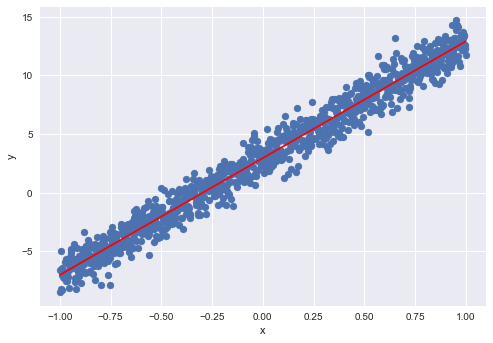

In [25]:
print('The estimated value for beta is:', beta)
print('The true value for beta is:', true_beta)

y_pred = np.matmul(beta,x1)

plt.plot(x, y_pred, 'r')
plt.scatter(x,y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [ ]:
# Define the function for our linear model
#Will take tuple

#Beta * xi
def model(param,x1):
    return param * x1.T



# Define the function for our loss function
def loss_func(param, x1, y):
    
    #print(np.shape(x1))
    
    #Y - Y hat
    y_hat = (model(param, x1).T) 
    
    return np.mean((y - y_hat) ** 2)


In [ ]:
loss_func(beta, x1, y)

## Gradient Descent Algorithm (1st Order Optimization) [Optional Exercise]

Gradient descent algorithm:


1. Initialize $\mathbf{\beta}$ by sampling from the standard normal distribution  $\mathcal{N} (0,1)$ 



2. At each iteration $k$, update the parameters $\mathbf{\beta}$ by this equation: \
   $$ \mathbf{\beta_{k+1}} = \mathbf{\beta_k} - \alpha \mathbf{\nabla} l(\beta_k) $$
   where $\alpha \sim 10^{-1}$ is the step size



3. Stop the algorithm when $|l(\beta_{k+1}) - l(\beta_k)| < \text{tolerance}$, we can use a small number, i.e. $10^{-7}$, as our tolerance value 



In [ ]:
#Beta 1 is slope
#Beta 0 is intercept

beta = np.random.normal(0,1,2)

alpha = 3e-1
tol = 1e-7
delta = 1

#Intercept and Slope
gradient = -2 * np.array([loss_func(beta, x1, y), np.mean(x1 * loss_func(beta, x1, y))])

stepSize = gradient * alpha

#stepSize[0] is intercept, stepSize[1] is gradient


def SGD(beta, stepsize, tol):
    
    
    #Calculating Beta
    newBeta = beta - stepSize
    delta = np.abs(newBeta - beta)
    
    if delta.any() < tol:
        return beta
    
    else:
        newStep = gradient * alpha
        
        return SGD(newBeta, newStep, tol)

SGD(beta, stepSize, tol)

In [26]:
beta = np.random.normal(0,1,2)

alpha = 6e-1
tol = 1e-7
delta = 1
k = 0

while np.abs(delta) >= tol:
    
    y_hat = model(beta, x1)
    g = -2*np.array([ np.mean(y-y_hat), np.mean(x*(y-y_hat)) ])
    
    
    prev_loss = loss_func(beta, x1, y)

    #solution for gradient descent
    beta -= alpha*g 
    
    current_loss = loss_func(beta, x1, y)
    
    delta = current_loss - prev_loss
    
    print('At {}-th step, the loss is {:.3f}'.format(k, current_loss))
    k += 1

At 0-th step, the loss is 12.168
At 1-th step, the loss is 4.733
At 2-th step, the loss is 2.341
At 3-th step, the loss is 1.493
At 4-th step, the loss is 1.189
At 5-th step, the loss is 1.079
At 6-th step, the loss is 1.040
At 7-th step, the loss is 1.026
At 8-th step, the loss is 1.021
At 9-th step, the loss is 1.019
At 10-th step, the loss is 1.019
At 11-th step, the loss is 1.018
At 12-th step, the loss is 1.018
At 13-th step, the loss is 1.018
At 14-th step, the loss is 1.018
At 15-th step, the loss is 1.018
At 16-th step, the loss is 1.018
At 17-th step, the loss is 1.018
At 18-th step, the loss is 1.018
At 19-th step, the loss is 1.018


In [ ]:
temp = (y - (model(beta, x1).T)) 
    
#(np.sum(temp) / len(x1[0]))

temp

## Visualizing the result

The estimated value for beta is: [2.95057896 9.95575272]
The true value for beta is: [ 3 10]


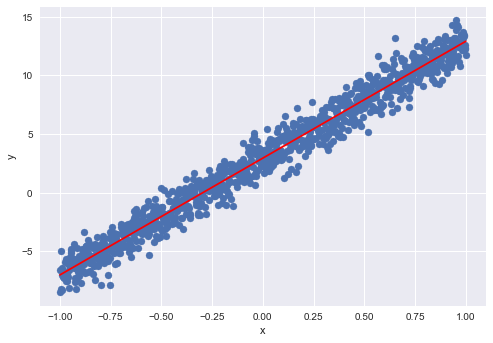

In [27]:
print('The estimated value for beta is:', beta)
print('The true value for beta is:', true_beta)

y_pred = np.matmul(beta,x1)

plt.plot(x, y_pred, 'r')
plt.scatter(x,y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()